# **Part 1: Data Exploration and Preprocessing**

Importing Libraries: Essential libraries such as pandas, seaborn, matplotlib, and sklearn are imported to handle data manipulation, visualization, and machine learning tasks.

**Loading the Dataset:**

 The Titanic dataset is loaded from a URL, providing access to historical data about passengers and their survival status.

**Exploratory Data Analysis (EDA):**

The first few rows of the dataset are displayed to understand its structure.
Missing values are identified to assess data quality.
Visualizations are created to explore the distribution of key features such as passenger class (Pclass), gender (Sex), age (Age), and fare (Fare).
Handling Missing Values:

Missing values in the Age column are filled with the median age.
Missing values in the Embarked column are filled with the mode (most frequent value).

The Cabin column is dropped due to a high number of missing values.

**Encoding Categorical Variables:**

The Sex and Embarked columns are converted into numerical format using LabelEncoder to make them suitable for model training.

**Feature Scaling:**

The numerical features Age and Fare are standardized using StandardScaler to ensure they have a mean of 0 and a standard deviation of 1, which helps improve model performance.

**Defining Features and Target Variable:**

The feature set (X) consists of Age and Fare, while the target variable (y) is the Survived column, indicating whether a passenger survived (1) or not (0).

**Train-Test Split:**

The dataset is split into training (70%) and testing (30%) sets to evaluate model performance on unseen data.

# **Part 2: Implementing k-NN and Decision Trees k-Nearest Neighbors (k-NN):**

A k-NN classifier is initialized with 5 neighbors and trained on the training dataset.

**Decision Tree:**

A Decision Tree classifier is also initialized and trained on the same training dataset.

**Model Predictions:**

Predictions for the test set are made using both models.

**Model Evaluation:**

Several evaluation metrics (accuracy, precision, recall, and F1-score) are calculated for both models to assess their performance in predicting survival.

# **Part 3: Visualization Plotting Decision Boundaries**:

A function (plot_decision_boundaries) is defined to visualize the decision boundaries of the trained models.

**This function:**

Creates a grid of values across the feature space.
Uses the trained model to predict outcomes across this grid and visualize the results using a contour plot.
Displays the actual data points on the plot, coloring them based on their survival status.

**Performance Visualization:**

A bar chart is generated to compare the performance metrics of the k-NN and Decision Tree models, allowing for a visual assessment of which model performed better based on the selected metrics.

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

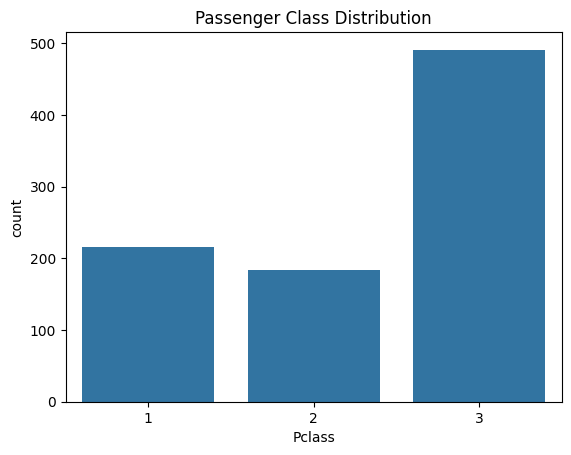

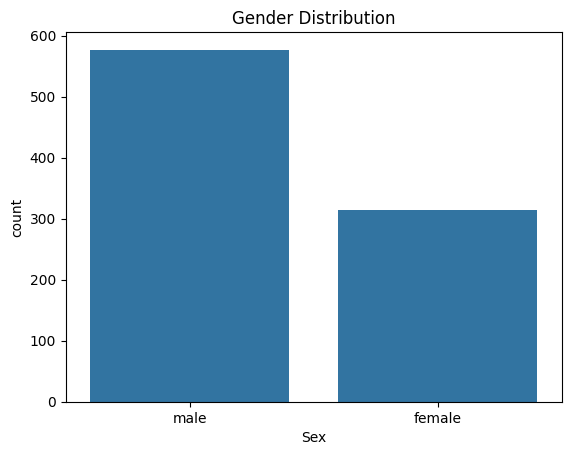

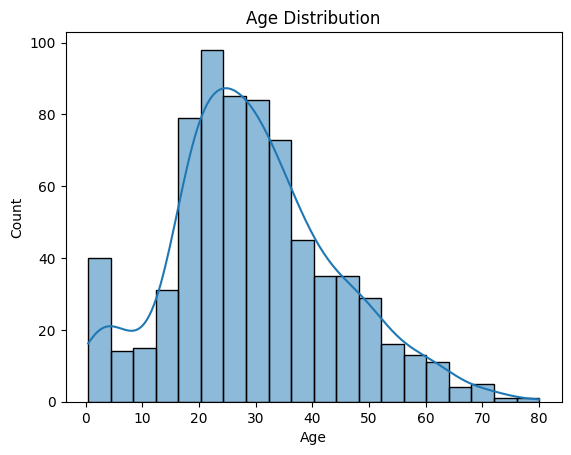

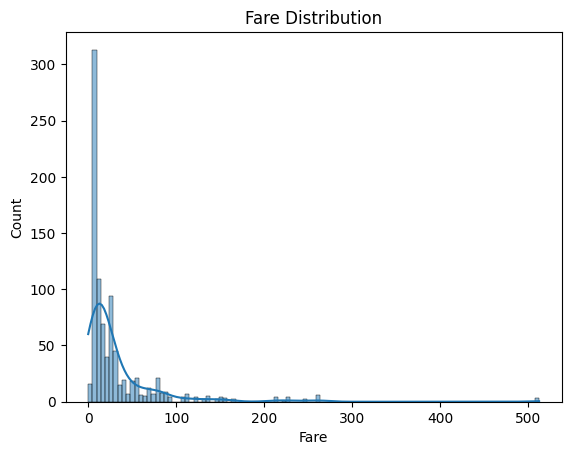

k-NN - Accuracy: 0.6828358208955224, Precision: 0.6625, Recall: 0.4774774774774775, F1-Score: 0.5549738219895288
Decision Tree - Accuracy: 0.6380597014925373, Precision: 0.5853658536585366, Recall: 0.43243243243243246, F1-Score: 0.49740932642487046


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


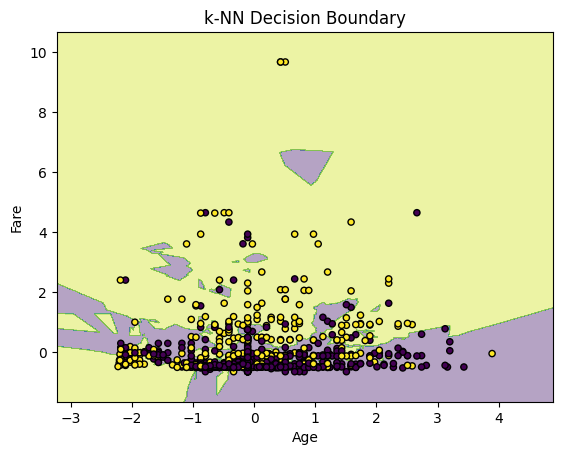

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


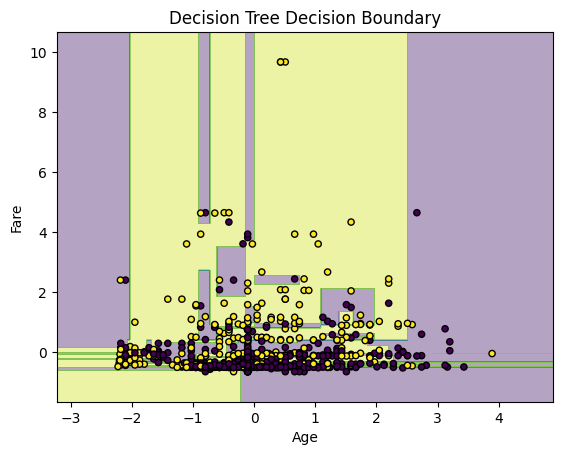

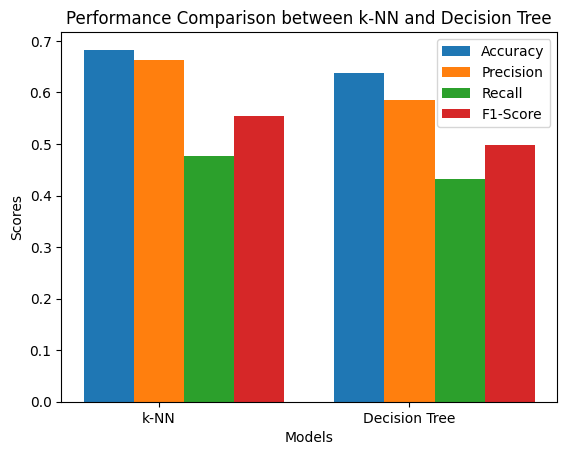

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Part 1: Data Exploration and Preprocessing

# Load the Titanic dataset directly from an online source
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(titanic_data.head())

# Check for missing values
print(titanic_data.isnull().sum())

# Visualize the distribution of key features
sns.countplot(x='Pclass', data=titanic_data)
plt.title('Passenger Class Distribution')
plt.show()

sns.countplot(x='Sex', data=titanic_data)
plt.title('Gender Distribution')
plt.show()

sns.histplot(titanic_data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(titanic_data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

# Fill missing values in Age with the median and Embarked with the mode
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

# Standardize numerical features: Age and Fare
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Define feature set and target variable (using only 'Age' and 'Fare' for visualization)
X = titanic_data[['Age', 'Fare']]
y = titanic_data['Survived']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Part 2: Implementing k-NN and Decision Trees

# k-Nearest Neighbors (k-NN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Model Evaluation

# k-NN predictions
knn_predictions = knn.predict(X_test)

# Decision Tree predictions
dt_predictions = decision_tree.predict(X_test)

# Evaluation metrics for k-NN
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)

print(f"k-NN - Accuracy: {knn_accuracy}, Precision: {knn_precision}, Recall: {knn_recall}, F1-Score: {knn_f1}")

# Evaluation metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

print(f"Decision Tree - Accuracy: {dt_accuracy}, Precision: {dt_precision}, Recall: {dt_recall}, F1-Score: {dt_f1}")

# Part 3: Visualization

# Function to plot decision boundaries
def plot_decision_boundaries(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.show()

# Use the trained models for decision boundary plotting
X_vis = X.values
y_vis = y.values

# Plot decision boundaries for k-NN
plot_decision_boundaries(knn, X_vis, y_vis, title="k-NN Decision Boundary")

# Plot decision boundaries for Decision Tree
plot_decision_boundaries(decision_tree, X_vis, y_vis, title="Decision Tree Decision Boundary")

# Performance Visualization

# Plot bar chart for performance comparison
models = ['k-NN', 'Decision Tree']
accuracies = [knn_accuracy, dt_accuracy]
precisions = [knn_precision, dt_precision]
recalls = [knn_recall, dt_recall]
f1_scores = [knn_f1, dt_f1]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()
ax.bar(x - width, accuracies, width, label='Accuracy')
ax.bar(x, precisions, width, label='Precision')
ax.bar(x + width, recalls, width, label='Recall')
ax.bar(x + 2*width, f1_scores, width, label='F1-Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison between k-NN and Decision Tree')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()
